# Week-4: Part-1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Set size of figure
plt.rcParams['figure.figsize'] = [8, 8]
# Set size of font
plt.rcParams['font.size'] = 10

## Sampling

Sampling from a distribution is an important skill. While learning ML, it is often a good idea to work with toy-datasets. These toy-datasets can be generated from well known distributions such as the Bernoulli and Gaussian. The next section will introduce the idea of sampling in NumPy.

### Random number generator

We can sample from distributions using a random number generator:

In [ ]:
rng = np.random.default_rng()

We will start by generating a dataset of ones and zeros. The following code generates a sample of size $10$.

In [ ]:
rng = np.random.default_rng(seed = 1001)
X = rng.integers(0, 2, size = 10)
X

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

Notice that we have used a seed value as an argument to the random number generator. This is meant to ensure reproducability. That is, no matter how many times this cell is run, we will get the same sequence of random numbers. First run the cell a few times to verify that this is true. Now, run the cell with a different seed value and see what happens.

## Problem-1

For the dataset `X` given below, what is the maximum likelihood estimate of the mean if we use a Bernoulli distribution with parameter $p$ to model this data? Perform all your operations in the cell given below. Do not change the seed value. Enter your answer correct to three decimal places.

In [ ]:
### Data ###
rng = np.random.default_rng(seed = 1001)
X = rng.integers(0, 2, size = 1000)
### Solution ###
print(X.mean())

0.506


What happens if we increase the size of the dataset to $10000$? We see that `np.integers` is only giving us observations from a uniform distribution. In other words, the coin is unbiased. How do we generate samples from a biased coin or a Bernoulli distribution with $p \neq 0.5$? We use a method called `choice`. This method "chooses" numbers from a list or an array based on the probabilities given to it in the array `p`.

In [ ]:
rng = np.random.default_rng(seed = 1001)
X = rng.choice([0, 1], size = 10, p = [0.2, 0.8])
X

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

Note that the array `p` specifies the probabilities of $0$ and $1$.

## Problem-2

Sample $1000$ points froma  Bernoulli distribution whose parameter is $p = 0.7$. Compute the maximum likelihood estimate of this sample. Perform all your operations in the cell given below. Enter your answer correct to three decimal places.

**Note**

(1) The parameter $p$ of a Bernoulli distribution always points to $P(x = 1)$.

(2) It may seem pointless to compute the MLE when the parameter is already known to us. But this is a good exercise to verify our understanding of concepts with such toy-datasets.

In [ ]:
### RNG ###
rng = np.random.default_rng(seed = 1001)
### Solution ###
X = rng.choice([0, 1], size = 1000, p = [0.3, 0.7])
X.mean()

0.707

## Problem-3

Plot a bar graph of the above sample. You can use the `plt.bar` method. To know more about a method in Google Colab type `plt.bar?` in a cell and run it.

<BarContainer object of 2 artists>

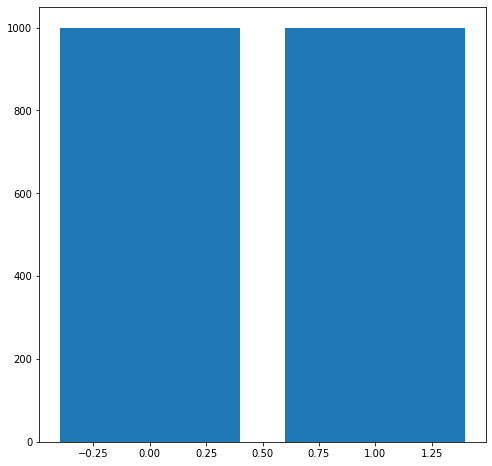

In [ ]:
### Solution ###
plt.bar([0, 1], [(X == 0).shape[0], (X == 1).shape[0]])

## Problem-4

What is the impact of the size of the dataset on the MLE? Generate datasets of the following sizes:

(1) $n = 10$

(2) $n = 100$

(3) $n = 1000$

(4) $n = 10000$

(5) $n = 100000$

(6) $n = 1000000$

Sample each dataset from a Bernoulli distribution with parameter $p = 0.2$. For each dataset, first compute the MLE and then compute the difference (abs value) between the MLE and the true parameter. That is, compute the value $d$ for different values of $n$

$$
d(n) = |\hat{p}_{ML} - p|
$$

Plot $d(n)$ with respect to $n$. What do you observe?

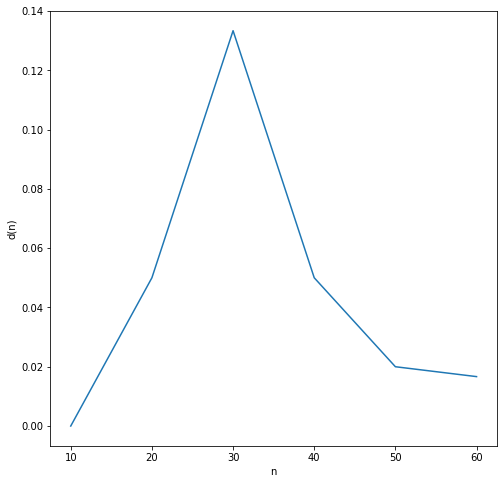

In [ ]:
### Solution ###
rng = np.random.default_rng(seed = 2001)
p = 0.2
trials = [10 * i for i in range(1, 7)]
x_axis, y_axis = [ ], [ ]
for n in trials:
    X = rng.choice([0, 1], size = n, p = [0.8, 0.2])
    p_ml = X.mean()
    y_axis.append(abs(p_ml - p))
    x_axis.append(n)
plt.plot(x_axis, y_axis)
plt.ylabel('d(n)')
plt.xlabel('n');

We have to be careful here. Though the estimate $p_{\tiny ML}$ should become more accurate as $n$ increases, we might be lucky one some occasions. For example, if $n = 10$ and we get two ones and eight zeros, then the estimate is exactly equal to the true parameter. So, we can't expect the curve to be strictly decreasing! Try it out with different seed values to observe the changes.

## Problem-5

Sample $1000$ points from a six sided, biased die with faces: $1, 2, 3, 4, 5, 6$. The parameters corresponding to the six faces are:

$$
[0.1, 0.2, 0.3, 0.3, 0.05, 0.05]
$$

Note that this is a categorical distribution. Refer to the practice assignment for a similar problem. Find the maximum likelihood estimate of the parameter $p_3$. Perform all your operations in the cell given below. Enter your answer correct to three decimal places.

In [ ]:
### RNG ###
rng = np.random.default_rng(seed = 1001)
### Solution ###
X = rng.choice([1, 2, 3, 4, 5, 6], size = 1000, 
               p = [0.1, 0.2, 0.3, 0.3, 0.05, 0.05])

sum(X == 3) / X.shape[0]

0.319

## Problem-6

Plot the bar graph for the above sample.

<BarContainer object of 6 artists>

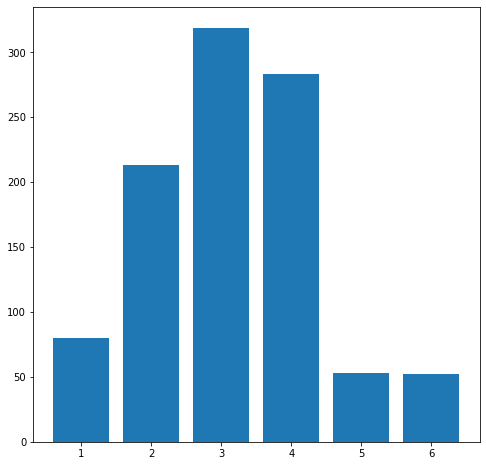

In [ ]:
## Solution ##
plt.bar(range(1, 7), [sum(X == f) for f in range(1, 7)])

We now move to the Gaussian distribution. First, we shall get used to computing the density of a Gaussian given its mean and variance.

## Problem-7

Consider the following Gaussian distribution:

$$
\mathcal{N}(3, 1.5^2)
$$

Compute the density of the point $5$ with respect to this distribution. Enter your answer correct to three decimal places.

In [ ]:
## Solution ##
def gaussian(x, mu, sigma):
    den = np.sqrt(2 * np.pi) * sigma
    num = np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    return num / den

gaussian(5, 3, 1.5)

0.10934004978399575

Now, we shall move to sampling from a Gaussian distribution.

## Problem-8

Generate a sample of $1000$ points from a Gaussian distribution with mean $3$ and standard deviation $1.5$. Find the maximum likelihood estimate of the mean using this sample. Enter your answer correct to three decimal places. Use the cell given below for all your computations. You can search for the method to use from the NumPy docs. It is quite similar to what we did for the case of the Bernoulli and categorical distributions.

In [ ]:
### RNG ###
rng = np.random.default_rng(seed = 1001)
### Solution ###
X = rng.normal(3, 1.5, 1000)
X.mean()

2.9444187484087863

## Problem-9

Plot a histogram of the dataset given above. Use the `plt.hist` method.

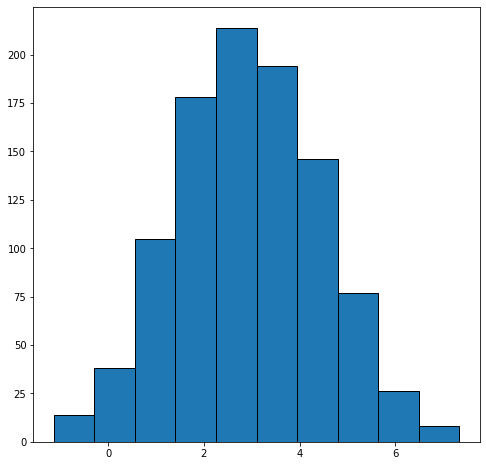

In [ ]:
plt.hist(X, bins = 10, ec = 'black');

We will now turn to understanding the shapes of the Beta distribution for different values of parameters $\alpha$ and $\beta$.

## Problem-10

Plot the beta distribution for the following values:

- $\alpha = 5, \beta = 5$
- $\alpha = 5, \beta = 1.5$
- $\alpha = 1.5, \beta = 5$
- $\alpha = 0.5, \beta = 0.5$


Do not worry about the normalization constant.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in power


([], <a list of 0 Text major ticklabel objects>)

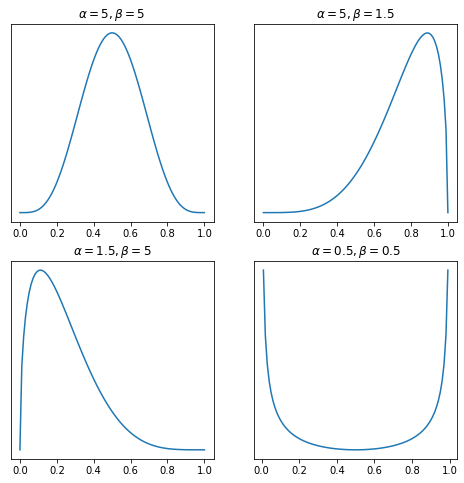

In [ ]:
## Solution ##
x = np.linspace(0, 1, 100)
# alpha = 5, beta = 5
plt.subplot(2, 2, 1)
alpha, beta = 5, 5
bd = (x ** (alpha - 1)) * (1 - x) ** (beta - 1)
plt.plot(x, bd)
plt.title(r'$\alpha = 5, \beta = 5$')
plt.yticks([ ])
# alpha = 5, beta = 1.5
plt.subplot(2, 2, 2)
alpha, beta = 5, 1.5
bd = (x ** (alpha - 1)) * (1 - x) ** (beta - 1)
plt.plot(x, bd)
plt.title(r'$\alpha = 5, \beta = 1.5$')
plt.yticks([ ])
# alpha = 1.5, beta = 5
plt.subplot(2, 2, 3)
alpha, beta = 1.5, 5
bd = (x ** (alpha - 1)) * (1 - x) ** (beta - 1)
plt.plot(x, bd)
plt.title(r'$\alpha = 1.5, \beta = 5$')
plt.yticks([ ])
# alpha = 0.5, beta = 0.5
plt.subplot(2, 2, 4)
alpha, beta = 0.5, 0.5
bd = (x ** (alpha - 1)) * (1 - x) ** (beta - 1)
plt.plot(x, bd)
plt.title(r'$\alpha = 0.5, \beta = 0.5$')
plt.yticks([ ])